In [2]:
import os

# # Google Drive'ı bağlama
# from google.colab import drive
# drive.mount('/content/drive')

# Çalışma dizinini değiştirme
os.chdir('/content/drive/MyDrive/Python Tensorflow')

# Mevcut çalışma dizinini doğrulama
print("Mevcut dizin:", os.getcwd())

# Dosyaları listeleme
print("Dizin içeriği:")
!ls


Mevcut dizin: /content/drive/MyDrive/Python Tensorflow
Dizin içeriği:
bisiklet_fiyatlari.xlsx				 maliciousornot.xlsx	X.npy
convolutional_neural_network_cnn_tutorial.ipynb  merc.xlsx		yenimaas.xlsx
deep_learning_tutorial_for_beginners.ipynb	 TensorflowGiris.ipynb	Y.npy


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Any results you write to the current directory are saved as output.

In [4]:
ls

bisiklet_fiyatlari.xlsx                          maliciousornot.xlsx    X.npy
convolutional_neural_network_cnn_tutorial.ipynb  merc.xlsx              yenimaas.xlsx
deep_learning_tutorial_for_beginners.ipynb       TensorflowGiris.ipynb  Y.npy


Overview the Data Set


(-0.5, 63.5, 63.5, -0.5)

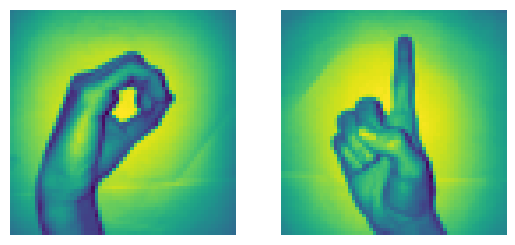

In [5]:
# load data set
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [6]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [7]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [8]:

X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [9]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Logistic Regression


In [10]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)

def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

Forward Propagation


In [11]:
# calculation of z
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [12]:
# Forward propagation steps:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    return cost

Optimization Algorithm with Gradient Descent


In [13]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [14]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [15]:
# prediction
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 14.014222
Cost after iteration 10: 1.918535
Cost after iteration 20: 1.750365
Cost after iteration 30: 1.653524
Cost after iteration 40: 1.560956
Cost after iteration 50: 1.457745
Cost after iteration 60: 1.335495
Cost after iteration 70: 1.191800
Cost after iteration 80: 1.027511
Cost after iteration 90: 0.843100
Cost after iteration 100: 0.639890
Cost after iteration 110: 0.432595
Cost after iteration 120: 0.278192
Cost after iteration 130: 0.221609
Cost after iteration 140: 0.208972
Cost after iteration 150: 0.203415
Cost after iteration 160: 0.198754
Cost after iteration 170: 0.194446
Cost after iteration 180: 0.190433
Cost after iteration 190: 0.186683
Cost after iteration 200: 0.183171
Cost after iteration 210: 0.179872
Cost after iteration 220: 0.176765
Cost after iteration 230: 0.173833
Cost after iteration 240: 0.171059


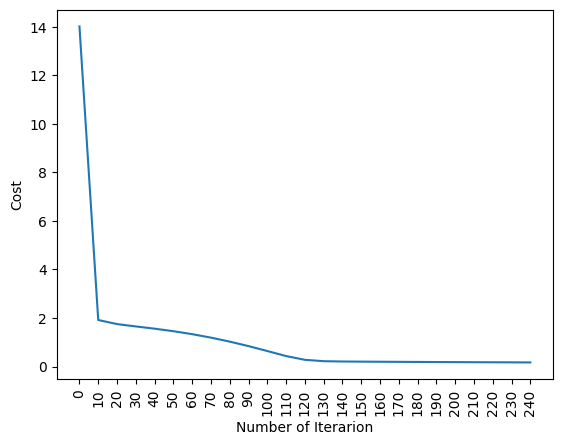

train accuracy: 94.54022988505747 %
test accuracy: 95.16129032258064 %


In [16]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.009, num_iterations = 250)

Logistic Regression with Sklearn


In [17]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


Artificial Neural Network (ANN)



*Layer Neural Network*

In [18]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

Forward propagation


In [19]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

Loss function and Cost function


In [20]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

Backward propagation


In [21]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

Update Parameters


In [22]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}

    return parameters

Prediction with learnt parameters weight and bias


In [23]:
# prediction
def predict_NN(parameters,x_test):
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Create Model


Cost after iteration 0: 0.351988
Cost after iteration 100: 0.321910
Cost after iteration 200: 0.303199
Cost after iteration 300: 0.272555
Cost after iteration 400: 0.234047
Cost after iteration 500: 0.198043
Cost after iteration 600: 0.144995
Cost after iteration 700: 0.143505
Cost after iteration 800: 0.124950
Cost after iteration 900: 0.109120
Cost after iteration 1000: 0.095708
Cost after iteration 1100: 0.084189
Cost after iteration 1200: 0.068049
Cost after iteration 1300: 0.069280
Cost after iteration 1400: 0.061086
Cost after iteration 1500: 0.053961
Cost after iteration 1600: 0.047912
Cost after iteration 1700: 0.042829
Cost after iteration 1800: 0.038579
Cost after iteration 1900: 0.035030
Cost after iteration 2000: 0.032047
Cost after iteration 2100: 0.029512
Cost after iteration 2200: 0.027334
Cost after iteration 2300: 0.025443
Cost after iteration 2400: 0.023787


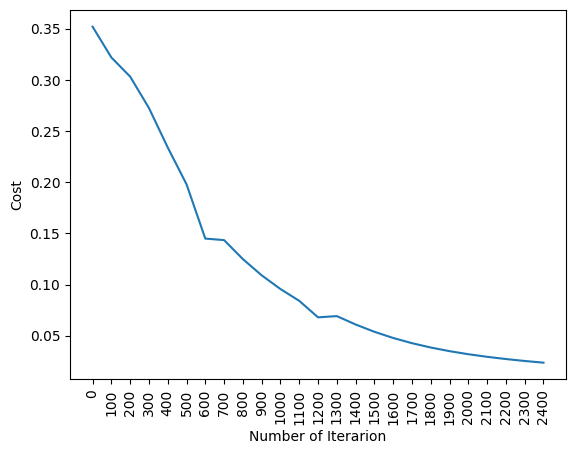

train accuracy: 100.0 %
test accuracy: 96.7741935483871 %


In [24]:
# Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

L Layer Neural Network


In [25]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [26]:
# Gerekli kütüphaneleri içe aktaralım
try:
    from scikeras.wrappers import KerasClassifier
except ImportError:
    !pip install scikeras
    from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modeli oluşturma fonksiyonu
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=x_train.shape[1]))
    classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# KerasClassifier sarmalayıcıyı kullanarak modeli oluşturma
classifier = KerasClassifier(model=build_classifier, epochs=100, batch_size=10)

# Çapraz doğrulama ile modelin performansını değerlendirme
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=3)
mean = accuracies.mean()
variance = accuracies.std()

# Sonuçları yazdırma
print("Ortalama doğruluk: " + str(mean))
print("Doğruluk varyansı: " + str(variance))


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4572 - loss: 0.6936
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5144 - loss: 0.6928
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5252 - loss: 0.6915
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5303 - loss: 0.6894
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5180 - loss: 0.6812
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 0.6640
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6238 - loss: 0.6523
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7946 - loss: 0.5894
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8880 - loss: 0.5306 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8857 - loss: 0.4413
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8822 - loss: 0.3904
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

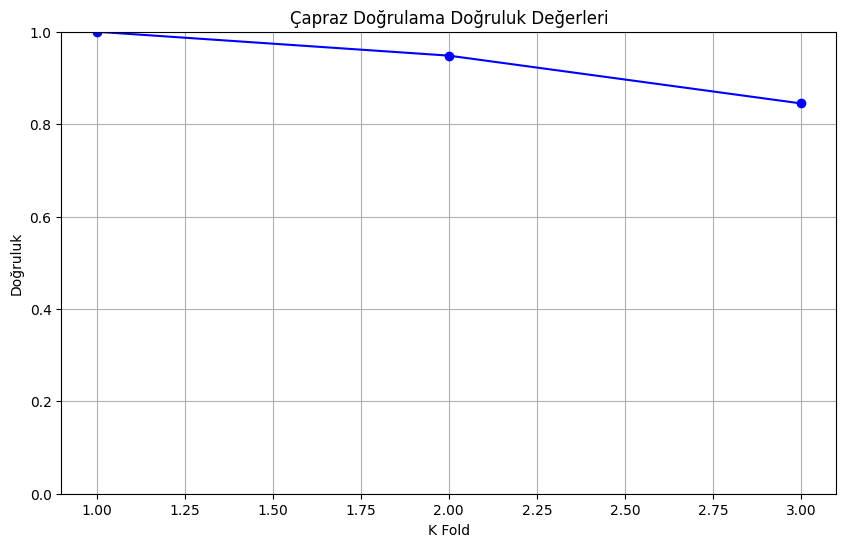

In [27]:
# Doğruluk değerlerini grafikleştirme
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o', linestyle='-', color='b')
plt.title('Çapraz Doğrulama Doğruluk Değerleri')
plt.xlabel('K Fold')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.grid(True)
plt.show()